In [16]:
# Lab: Predict the total daily transaction amounts.
# Realized by: Anas FILALI - EMSI 2023/2024
# Reference: https://www.kaggle.com/competitions/effyis-datalab-chalenge/overview

import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: DataSet
# Load your main data
data = pd.read_csv("file:///C:/Users/blackdot/PycharmProjects/Lab_DL/Lab3/dataset/train_test_data.csv")

# Display basic information about the dataset
print("Dataset Head:")
print(data.head())
print("\nDataset Shape:")
print(data.shape)
print("\nDataset Information:")
print(data.info())




Dataset Head:
                  Date   Id_compte  amount_transaction  \
0  2022-01-01 00:23:00   SEWC_CL.1              462.96   
1  2022-01-01 00:26:00  SEW0C_LI.1               15.51   
2  2022-01-01 01:01:00        US.1                2.24   
3  2022-01-01 01:21:00        TA.1                2.86   
4  2022-01-01 01:54:00        US.1                1.68   

                           category_transaction  
0                      Food & Drink - Groceries  
1  General Services - Home Repair + Maintenance  
2              Bank Transfers - ATM withdrawals  
3             Transportation - Public Transport  
4              Bank Transfers - ATM withdrawals  

Dataset Shape:
(20411, 4)

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20411 entries, 0 to 20410
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  20411 non-null  object 
 1   Id_compte             

In [17]:
# Load the holidays dataset
holidays = pd.read_csv("file:///C:/Users/blackdot/PycharmProjects/Lab_DL/Lab3/dataset/holidays.csv")  # Adjust the path accordingly

# Convert the 'Date' column to datetime
data['Date'] = pd.to_datetime(data['Date'])
print("\nDataset Information After Converting 'Date' to Datetime:")
print(data.info())




Dataset Information After Converting 'Date' to Datetime:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20411 entries, 0 to 20410
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Date                  20411 non-null  datetime64[ns]
 1   Id_compte             20411 non-null  object        
 2   amount_transaction    20411 non-null  float64       
 3   category_transaction  20411 non-null  object        
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 638.0+ KB
None


In [19]:
# Convert the 'Holiday_Date' column in the holidays dataset to datetime
holidays['Holiday_Date'] = pd.to_datetime(holidays['Holiday_Date'])

# Merge the main dataset with the holidays dataset
data = pd.merge(data, holidays, left_on='Date', right_on='Holiday_Date', how='left')

# Create a new binary feature indicating whether a day is a holiday or not
data['is_holiday_Day'] = data['Holiday_Date'].notnull().astype(int)

# Create a new binary feature indicating whether a day is a weekend or not (1 for weekend, 0 for weekday)
data['is_weekend_Day'] = (data['Date'].dt.dayofweek >= 5).astype(int)

# Perform one-hot encoding for the 'category_transaction' column
data = pd.get_dummies(data, columns=['category_transaction'], prefix='category')

# Drop columns that may not contribute significantly to predicting amounts transactions per day
columns_to_drop = ['Id_compte', 'Holiday_Date']  # 'Holiday_Date' is dropped after merging
data = data.drop(columns=columns_to_drop)

KeyError: "None of [Index(['category_transaction'], dtype='object')] are in the [columns]"

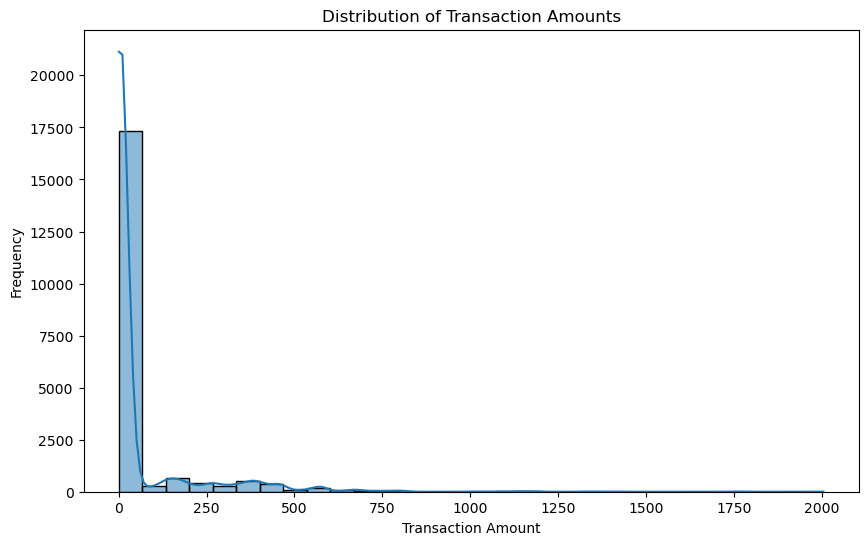

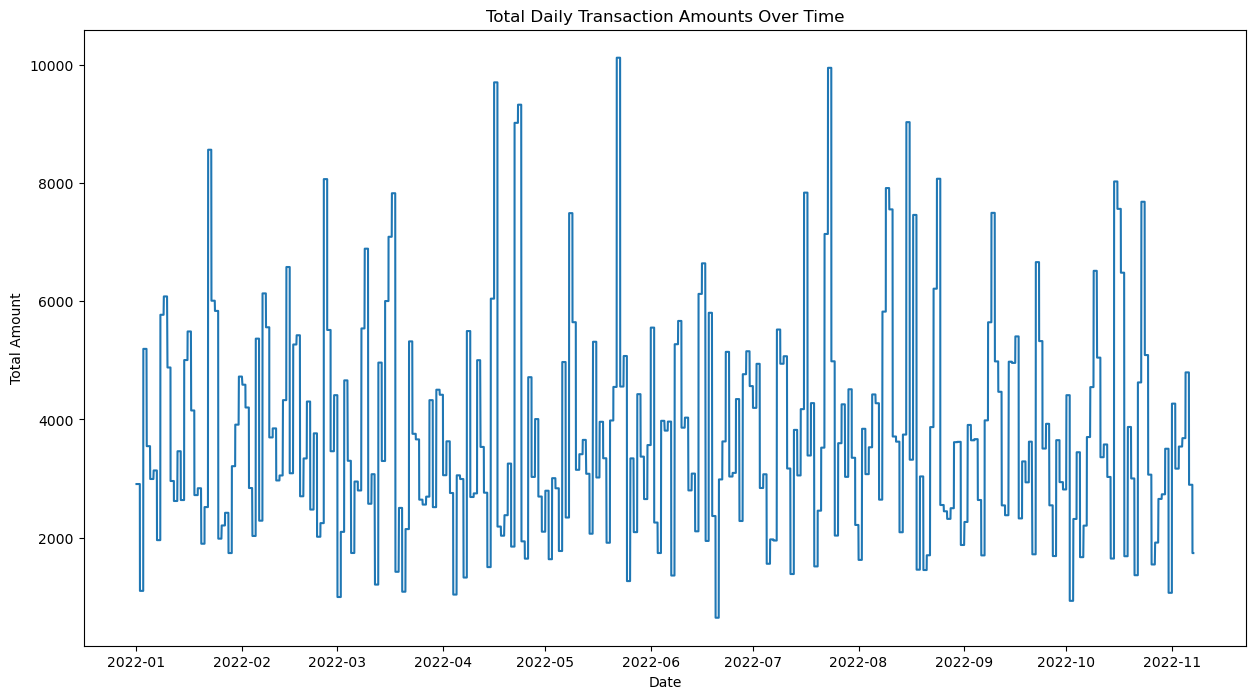

In [11]:
# Add a new column representing the total amount of transactions per day
data['total_amount_per_day'] = data.groupby(data['Date'].dt.date)['amount_transaction'].transform('sum')

# Add a new column representing the total amount of transactions per day per category
category_columns = [col for col in data.columns if col.startswith('category')]
data['total_amount_per_day_per_category'] = data.groupby(['Date'])[category_columns].transform('sum').sum(axis=1)

# Step 2: Exploratory Data Analysis (EDA)

# Visualize the distribution of the target variable 'amount_transaction'
plt.figure(figsize=(10, 6))
sns.histplot(data['amount_transaction'], bins=30, kde=True)
plt.title('Distribution of Transaction Amounts')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.show()

# Visualize the total daily transaction amounts over time
plt.figure(figsize=(15, 8))
sns.lineplot(x='Date', y='total_amount_per_day', data=data)
plt.title('Total Daily Transaction Amounts Over Time')
plt.xlabel('Date')
plt.ylabel('Total Amount')
plt.show()



In [4]:
# Visualize the total daily transaction amounts per category over time
plt.figure(figsize=(15, 8))
sns.lineplot(x='Date', y='total_amount_per_day_per_category', data=data)
plt.title('Total Daily Transaction Amounts Per Category Over Time')
plt.xlabel('Date')
plt.ylabel('Total Amount Per Category')
plt.show()

# Explore correlations between features and the target variable
correlation_matrix = data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

# Step 3: Feature Engineering

# Extract additional temporal features from the 'Date' column
data['day_of_month'] = data['Date'].dt.day
data['month'] = data['Date'].dt.month
data['quarter'] = data['Date'].dt.quarter
data['year'] = data['Date'].dt.year



NameError: name 'data' is not defined

<Figure size 1500x800 with 0 Axes>

In [ ]:
# Add lag features to capture temporal patterns
data['amount_transaction_lag1'] = data['amount_transaction'].shift(1)
data['amount_transaction_lag7'] = data['amount_transaction'].shift(7)

# Display the modified dataset
print("\nModified Dataset Head:")
print(data.head())
print("\nModified Dataset Shape:")
print(data.shape)
print("\nModified Dataset Information:")
print(data.info())
print(isnull().sum())